In [30]:
import alpaca_trade_api as alpaca_trade_api
import numpy as np
import pandas as pd
from scipy.signal import find_peaks,find_peaks_cwt
#import mplfinance as mpf
import matplotlib.pyplot as plt
import datetime as datetime 
from pandas.tseries.offsets import DateOffset


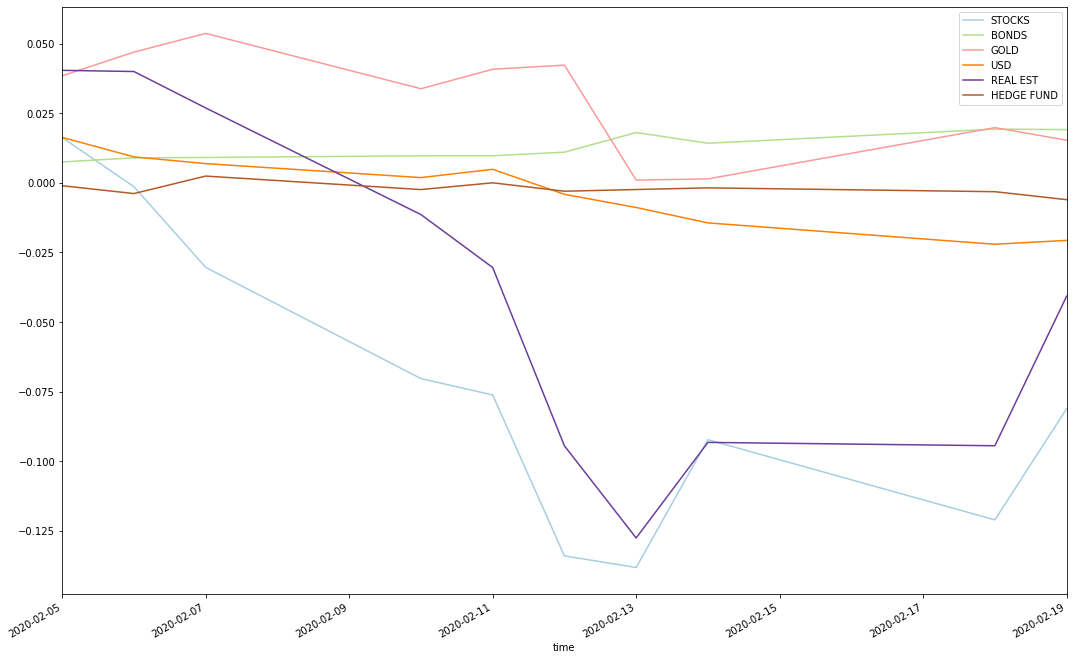

In [52]:
api = alpaca_trade_api.REST(key_id='PK714C2Y2AKEKG1GJHAQ',
                            secret_key='NwgIb/ZhtYWvEyulzuv6BfWnQJk0iqmxSnO/snKv',
                            base_url='https://paper-api.alpaca.markets',
                            api_version='v2') 

symbol = {'STOCKS':['SPY'],
          'BONDS':['AGG'],
          'GOLD':['GLD'],
          'USD':['UUP'],
          'REAL EST':['VNQ'],
          'HEDGE FUND':['MNA']}

period = 20
epoch = 10

iterations = int(period/epoch)

# number of days in the past track the change in
sectors = symbol.keys()
final_series=[]
for sector in sectors:
    for etf in symbol[sector]:
        bars = api.get_barset(etf, timeframe='day', limit=period)
        bd=bars.df[etf]
        #print(bd['close'])
        returns=-1*bd['close'].pct_change(-epoch)
        #print(returns[0:-epoch])
        returns.rename(sector,inplace=True)
        final_series.append(returns[0:-epoch])

final_df=pd.concat(final_series, axis=1)
final_df.plot(figsize=[18,12],colormap='Paired')
